**CUSTOMER SEGMENTATION ( AGE VS SPENDING SCORE )**

**WHY GO FOR AGE VS SPENDING SCORE**

Younger people (20s) often have higher spending scores (social/shopping lifestyle)

Older customers may have lower spending scores despite stable income

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (4).csv


In [29]:
df = pd.read_csv("Mall_Customers.csv")

print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
X = df[["Spending Score (1-100)", "Age"]]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

Plot Cluster

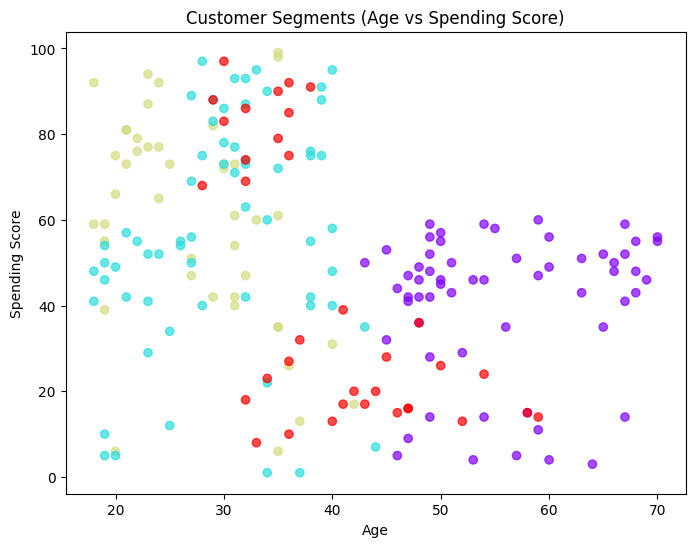

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(df["Age"], df["Spending Score (1-100)"],
            c=df["Cluster"], cmap="rainbow", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Customer Segments (Age vs Spending Score)")
plt.show()

Bar Chart

Cluster Profiles (Age vs Spending Score):
               Age  Spending Score (1-100)
Cluster                                   
0        55.716667               40.516667
1        29.838710               56.677419
2        27.511628               59.790698
3        39.828571               43.542857


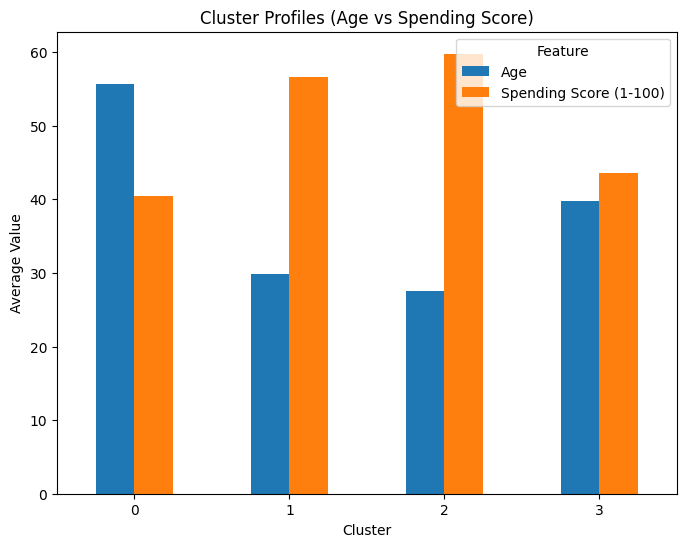

In [37]:
cluster_summary = df.groupby("Cluster")[["Age", "Spending Score (1-100)"]].mean()
print("Cluster Profiles (Age vs Spending Score):")
print(cluster_summary)

cluster_summary.plot(kind="bar", figsize=(8,6))
plt.title("Cluster Profiles (Age vs Spending Score)")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title="Feature")
plt.show()

Box Plot

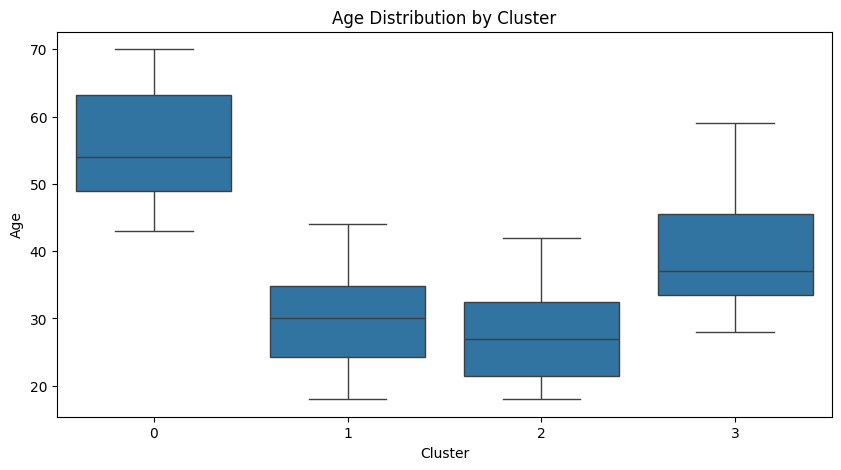

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Cluster", y="Age", data=df)
plt.title("Age Distribution by Cluster")
plt.show()

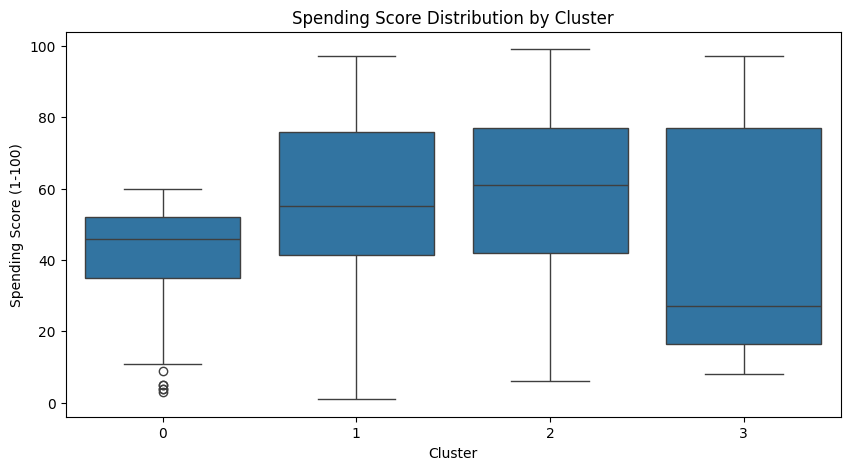

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Cluster", y="Spending Score (1-100)", data=df)
plt.title("Spending Score Distribution by Cluster")
plt.show()

In [23]:
df.to_excel("age_spending_clusters.xlsx", index=False)
files.download("age_spending_clusters.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>